In [1]:
# Import necessary libraries
import pandas as pd
import importlib
import sys
sys.path.append('..')
import causal_explainer_kit

importlib.reload(causal_explainer_kit.data_processing)
importlib.reload(causal_explainer_kit.explainers)
importlib.reload(causal_explainer_kit.visualization)

from causal_explainer_kit.data_processing import load_uci_repository, generate_random_row
from causal_explainer_kit.explainers import CausalExplainer
from causal_explainer_kit.visualization import display_causal_graph_customized
from sklearn.model_selection import train_test_split



In [2]:
# Load data, scaling=False means that the numerical features will not be scaled

# df = load_uci_repository("../data/predictive_maintenance.csv")   

df = load_uci_repository(scaling=True)


Removed 9 rows where Target is 1 and Failure_Type is 'No Failure'


In [3]:
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Power_output,wear_torque_product,Temp_difference,Failure_Type,Target,Type_n
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.622557,0.000000,0.644444,No Failure,0,1
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.609161,0.008420,0.644444,No Failure,0,0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.708143,0.014972,0.622222,No Failure,0,0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.512694,0.016761,0.622222,No Failure,0,0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.509509,0.021822,0.644444,No Failure,0,0


In [4]:
X = df.drop(columns=['Failure_Type'])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Initialize and fit explainer
# model_type can be (randomforest, catboost, xgboost and lgbmclassifier)
# explainer_type can be either shap or lime

explainer = CausalExplainer(model_type='catboost', 
                            top_n_features=3, 
                            explainer_type='shap') 

In [14]:
# Train on the whole dataset or only on X_train
train = 1
explainer.fit(train_data=(X if train == 1 else X_train))


In [ ]:
# Generate random instance based on the whole dataset on on X_test
dataframe_for_instance = X if train == 1 else X_test
test_instance = generate_random_row(dataframe=dataframe_for_instance, target_name='Target', target_value=1)
test_features = test_instance.drop(columns=['Target'])

In [16]:
# Predict causal graph
causal_graph = explainer.predict(test_features)

In [15]:
test_features.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Power_output,wear_torque_product,Temp_difference,Type_n
1016,0.108696,0.185185,0.087893,0.885989,0.094862,0.888863,0.099364,0.733333,1


Plot plot_1016_shap.png saved to: c:\Users\Iman\OneDrive\Desktop\CausalExplainabilityKit\image\plot_1016_shap.png


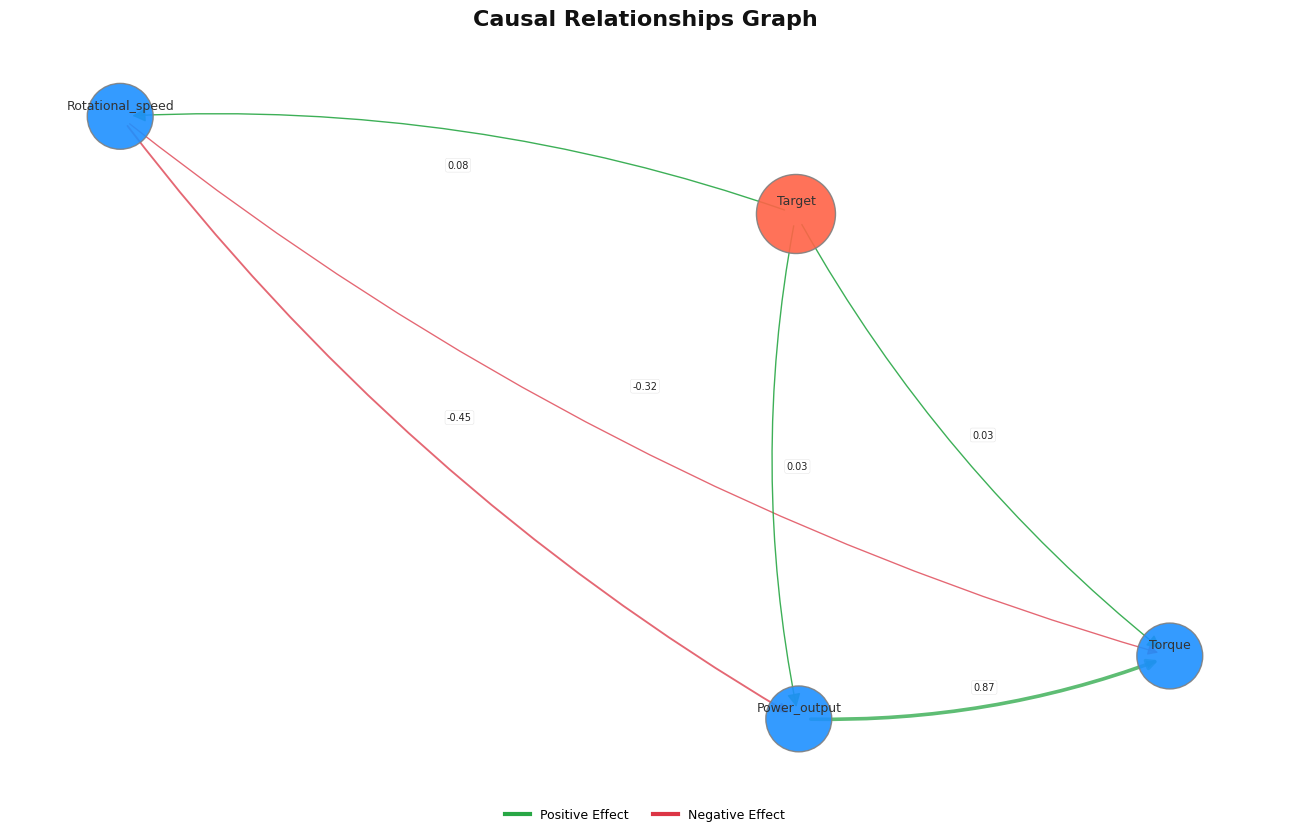

In [17]:
# Visualize the graph
display_causal_graph_customized(causal_graph=causal_graph,
                                target_node_name="Target",  
                                seed=120,                              
                                node_base_size=1800,
                                plot_name="plot_1016_shap.png"
)

<br>

---

<br>